In [18]:
import numpy as np
import pandas as pd
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf


In [19]:
dataset = pd.read_csv('kelompok1.csv', header=0)

In [20]:
dataset.head(266)


,Pitch,Label
0,-88.99,Berdiri
1,-88.99,Berdiri
2,-88.99,Berdiri
3,-89.11,Berdiri
4,-89.11,Berdiri
...,...,...
261,88.50,Terbalik
262,88.50,Terbalik
263,88.50,Terbalik
264,88.58,Terbalik


In [21]:
dataset['Label'] = pd.factorize(dataset['Label'])[0]
print(dataset)

     Pitch  Label
0   -88.99      0
1   -88.99      0
2   -88.99      0
3   -89.11      0
4   -89.11      0
..     ...    ...
262  88.50      2
263  88.50      2
264  88.58      2
265  88.58      2
266  88.58      2

[267 rows x 2 columns]


In [22]:
x = dataset.drop('Label', axis=1)
y = dataset['Label']
xTrain, xTest, yTrain, yTest=train_test_split(x, y, train_size=0.7, random_state=0)
print(xTest)
print(yTrain)


     Pitch
180  89.45
73  -88.47
214  88.47
8   -89.44
261  88.50
..     ...
122  -0.27
33  -88.71
106  -0.27
156  -0.28
137  -0.29

[81 rows x 1 columns]
243    2
21     0
228    2
109    1
16     0
      ..
251    2
192    2
117    1
47     0
172    1
Name: Label, Length: 186, dtype: int64


In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
print(model)

In [24]:
hasil_train = model.fit(xTrain, yTrain, epochs=1000, batch_size=150)

Epoch 1/1000


2/2 [==============================] - 0s 3ms/step - loss: 2.8506 - accuracy: 0.3656
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.8216 - accuracy: 0.3656
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.7930 - accuracy: 0.3656
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.7644 - accuracy: 0.3656
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.7363 - accuracy: 0.3656
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.7082 - accuracy: 0.3656
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.6806 - accuracy: 0.3656
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.6530 - accuracy: 0.3656
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6258 - accuracy: 0.3656
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.5987 - accuracy: 0.3656
Epoch 11/1000
2/2 [=============

In [30]:
import numpy as np

# Menentukan jumlah sampel yang ingin diprediksi
num_samples = 5

# Mengambil indeks secara acak dari xTest
random_indices = np.random.choice(xTest.shape[0], size=num_samples, replace=False)

# Mengambil sampel dari xTest berdasarkan indeks acak
xTest_sample = xTest.iloc[random_indices]

# Melakukan prediksi pada sampel tersebut
yPred_sample = model.predict(xTest_sample)

# Mencetak xTest_sample
print(xTest_sample)
print("")

# Mencetak "Hasil"
print("Hasil")
print("")

# Mencetak yTest dan yPred untuk sampel tersebut
print(yTest.iloc[random_indices])
print(yPred_sample)






1/1 [==============================] - 0s 15ms/step
     Pitch
63  -88.12
96   -0.31
122  -0.27
248  88.85
5   -89.11

Hasil

63     0
96     1
122    1
248    2
5      0
Name: Label, dtype: int64
[[0.00570586]
 [0.99505675]
 [1.0063261 ]
 [1.9818795 ]
 [0.00570586]]


In [31]:
yPred = np.round(model.predict(xTest))
cmatrix = confusion_matrix(yTest, yPred)
print(cmatrix)

3/3 [==============================] - 0s 1ms/step
[[25  0  0]
 [ 0 24  0]
 [ 0  0 32]]


In [32]:
print('Hasil:', classification_report(yTest,yPred))

Hasil:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        32

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



<AxesSubplot:>

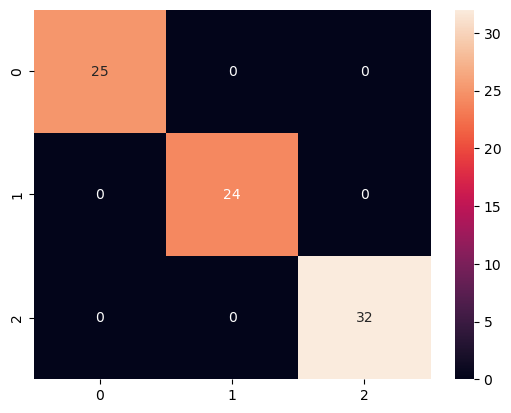

In [33]:
sns.heatmap(cmatrix, annot=True)